### Import libraries

##### Steps to follow:
1. Reading and understanding the data
2. Preparing data for modeling (split into train & test)
3. Training the model
4. Residual analysis
5. Prediction and evaluation on the test data


In [282]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# 1. EDA

#### 1.1 - Understand the Dataset

In [283]:
lead_data = pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [284]:
print(lead_data.shape)

(9240, 37)


In [285]:
print(lead_data.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [286]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [287]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- The majority of the columns have an object data type, which we will convert accordingly.

In [288]:
# Function to print the unique values from the cols
def get_unique_vals(data_set):
    for col in data_set.columns:
        unique_values = data_set[col].unique()
        print(f"'{col}': {unique_values}\n")

get_unique_vals(lead_data)

'Prospect ID': ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']

'Lead Number': [660737 660728 660727 ... 579545 579538 579533]

'Lead Origin': ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

'Lead Source': ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

'Do Not Email': ['No' 'Yes']

'Do Not Call': ['No' 'Yes']

'Converted': [0 1]

'TotalVisits': [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26. 

- In some of the columns, the "Select" value is observed, which might be due to the non-selection of the option. Hence, we can replace the select values with null values.

In [289]:
lead_data = lead_data.replace('Select', pd.NA)

- We have replaced "Select" with null values. Now, we can move ahead with handling missing values.

#### 1.2 - Handle Missing Values

In [290]:
# identifying the null valus in data
print(lead_data.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [291]:
# Identify the null values as a percentage.
print(lead_data.isnull().sum()*100/len(lead_data))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

- Drop the columns with null values exceeding 40%.

In [292]:
# Function that will remove the columns having null values based on the cutoff
def drop_null_vals(data_set, cut_off):
    
    empty_vals = list(data_set.columns[100*data_set.isnull().mean() > cut_off])
    print(f"List of columns having more than {cut_off}% empty values: {empty_vals}\n")
    print(f"Total columns: {len(data_set.columns)}")
    print(f"Removed columns: {len(empty_vals)}")
    
    data_set = data_set.drop(empty_vals, axis=1)
    print(f"Remaining columns: {len(data_set.columns)}")
    
    return data_set

lead_data = drop_null_vals(lead_data, 40)


List of columns having more than 40% empty values: ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

Total columns: 37
Removed columns: 7
Remaining columns: 30


In [293]:
print(lead_data.shape)

(9240, 30)


In [294]:
print(lead_data.isnull().sum()*100/len(lead_data))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [295]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### 1.3 - Categorical columns analysis

In [296]:
get_unique_vals(lead_data)

'Prospect ID': ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']

'Lead Number': [660737 660728 660727 ... 579545 579538 579533]

'Lead Origin': ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

'Lead Source': ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

'Do Not Email': ['No' 'Yes']

'Do Not Call': ['No' 'Yes']

'Converted': [0 1]

'TotalVisits': [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26. 

In [297]:
# List of categorical columns
catagorical_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 
                    'What matters most to you in choosing a course', 'Tags', 'City', 'Last Notable Activity']

In [298]:
# List of columns to remove
cols_to_remove = []

In [299]:
# Function that will create graph of the variable
def create_plot(col_name, figsize=(15, 5)):
    plt.figure(figsize=figsize)
    sns.countplot(x=col_name, hue='Converted', data=lead_data)
    plt.xticks(rotation=90)
    return plt.show()

- We have created a list of catagorical variables.
- We have created a empty list to remove columns that are not important for the analysis, we will append the columns accordingly
- We have created a function to create plot of the variable
- Now we will look into each column one by one for analysis.

**1. Lead Origin**

In [300]:
# Check the unique values of the variable
lead_data['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [301]:
# Check the value count of the variable
lead_data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

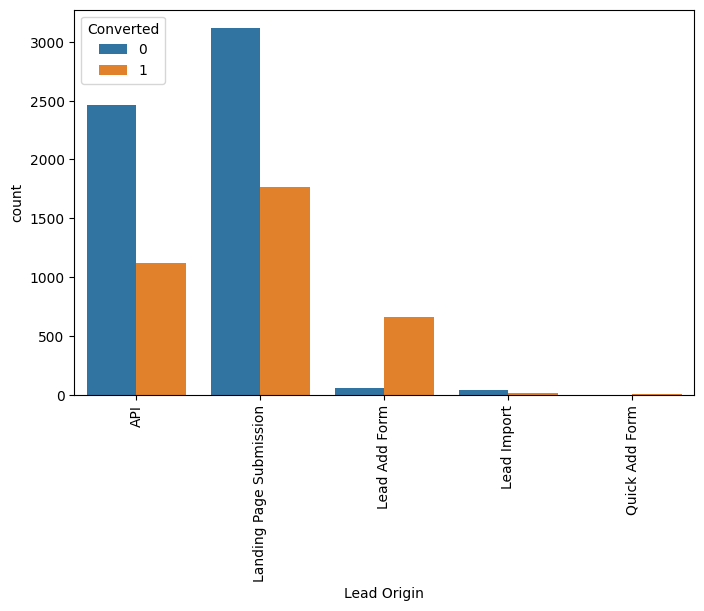

In [302]:
create_plot('Lead Origin', figsize=(8, 5))

**Conclusion:**
1. "Landing page submissions" and "API" have identified the most leads, and the majority of the leads converted from these sources.
2. "Lead Add Form" has a high lead conversion rate but the total identifies leads is less compared to "Landing page submissions" and "API".
3. "Lead Import" and "Quick Add Form" have gathered the least leads and have very low conversion rates.
4. We can focus on improving the conversion rate of "API" and "Landing page submissions".

**2. Lead Source**

In [303]:
# Check the unique values of the variable
lead_data['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [304]:
# Check the value count of the variable
lead_data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

- As we can see, there are many lead sources, some of which have collected very few leads.
- Therefore, we will keep the top 5 lead sources in their original form and replace the values of the others with "Others".
- We will also replace the null values with "Others"

In [305]:
# Replace the values with others
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'google', 'Click2call', 
                                                             'Press_Release', 'Social Media', 'Live Chat', 'youtubechannel', 'testone', 
                                                             'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM'], 'Others')

In [306]:
# Replace the null values with others
lead_data['Lead Source'] = lead_data['Lead Source'].fillna('Others')

In [307]:
# Check the value count of the variable
lead_data['Lead Source'].value_counts(dropna=False)

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Others             386
Name: Lead Source, dtype: int64

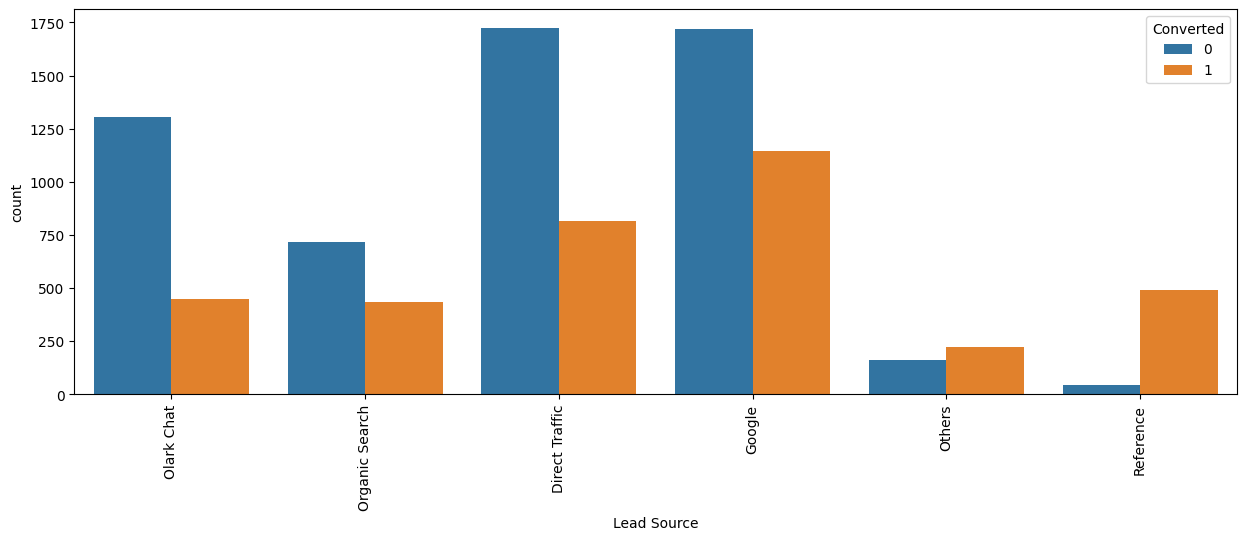

In [308]:
# Create plot for better understanding
create_plot("Lead Source")

**Conclusion:**
1. "Direct traffic" and "Google" have gathered the most leads and have the highest conversion rate.
2. "Olark chat" and "Organic search" have almost similar conversion rates, but the non-conversion rate is lower for "Organic search."
3. "Reference" has the highest conversion rate, and most of the leads successfully converted.
4. In order to improve the conversion rate, we should focus more on "Reference" by providing some kind of discount options to the referrals.
5. "Others" have a very low conversion rate.

**3. Last Activity**

In [309]:
# Check the unique values of the variable
lead_data['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [310]:
# Check the value count of the variable
lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

- Here, we will keep the top 10 last activities in their original form and replace the values of the others with "Others".
- We will also replace the null values with "Others"

In [311]:
# Replace the values with others
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 
                                                                 'View in browser link Clicked', 'Email Received', 'Email Marked Spam', 
                                                                 'Visited Booth in Tradeshow', 'Resubscribed to emails'], 'Others')

In [312]:
# Replace the null values with others
lead_data['Last Activity'] = lead_data['Last Activity'].fillna('Others')

In [313]:
# Check the value count of the variable
lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

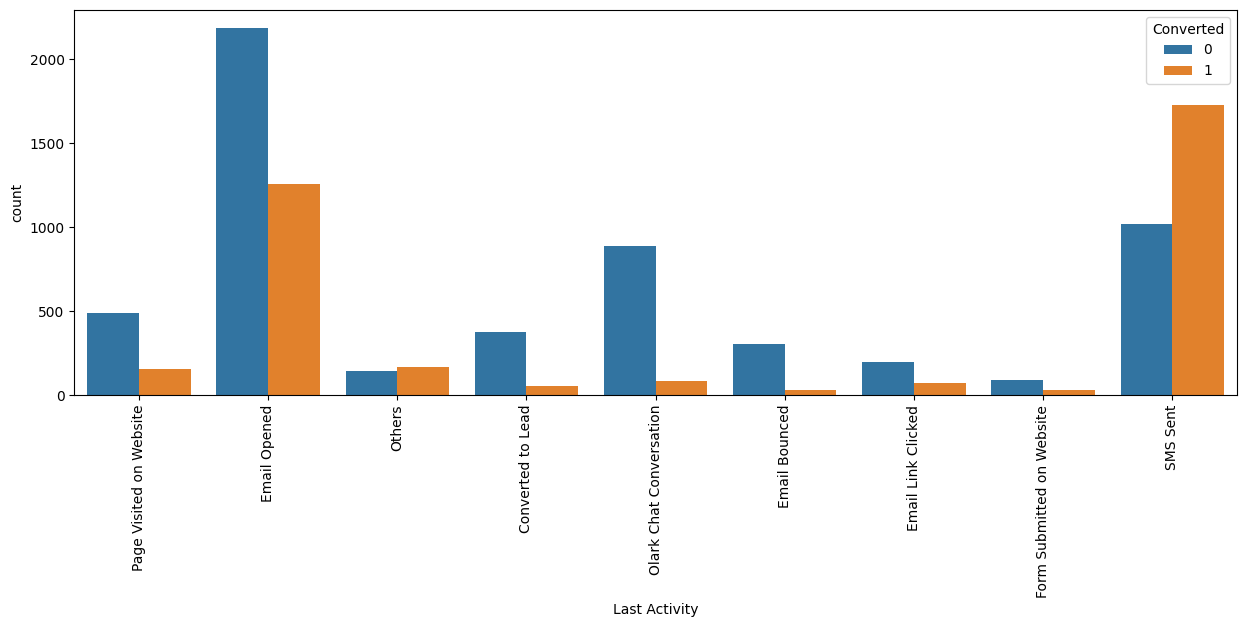

In [314]:
# Create plot for better understanding
create_plot("Last Activity")

**Conclusion:**
1. "Email Opened" and "SMS Sent" have the highest conversion rate.

**4. Country**

In [315]:
# Check the unique values of the variable
lead_data['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [316]:
# Check the value count of the variable
lead_data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

- Since majority of the leads are from india, hence we will replace the null values with india.
- We will replace the values of the other countries with "Others".

In [317]:
# Replace the values with others
lead_data['Country'] = lead_data['Country'].replace(['United Kingdom', 'Australia', 'Qatar', 'Bahrain', 'Hong Kong', 'Oman', 'France', 'unknown', 'Kuwait', 
                                                     'South Africa', 'Canada', 'Nigeria', 'Germany', 'Sweden', 'Philippines', 'Uganda', 'Italy', 'Bangladesh', 
                                                     'Netherlands', 'Asia/Pacific Region', 'China', 'Belgium', 'Ghana', 'Kenya', 'Sri Lanka', 'Tanzania', 
                                                     'Malaysia', 'Liberia', 'Switzerland', 'Denmark', 'Russia', 'Vietnam', 'Indonesia','United States', 
                                                     'United Arab Emirates', 'Singapore', 'Saudi Arabia'], 'Other_countries')

In [318]:
# Replace the null values with others
lead_data['Country'] = lead_data['Country'].fillna('India')

In [319]:
# Check the value count of the variable
lead_data['Country'].value_counts(dropna=False)

India              8953
Other_countries     287
Name: Country, dtype: int64

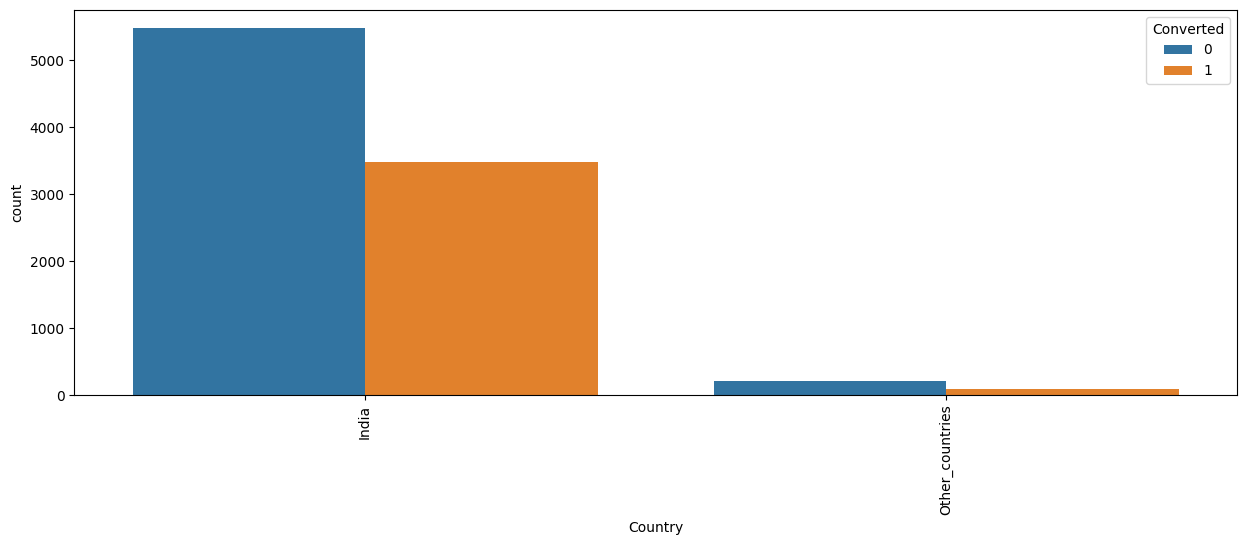

In [320]:
# Create plot for better understanding
create_plot("Country")

In [321]:
# Append the column name in empty list to drop it
cols_to_remove.append("Country")

**Conclusion:**
1. We can see that most of the leads are coming from india.
2. Since majority of the values in variable "Country" is "India", we can drop this variable.

**5. Specialization**

In [322]:
# Check the unique values of the variable
lead_data['Specialization'].unique()

array([<NA>, 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [323]:
# Check the value count of the variable
lead_data['Specialization'].value_counts(dropna=False)

<NA>                                 1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- As we can see the "<NA>" and "NaN" values are more, which means the "Specialization" was not specified during form filling process.
- We will replace the values of "<NA>" and "NaN" with "not_selected".

In [324]:
# Replace the null values with others
lead_data['Specialization'] = lead_data['Specialization'].fillna('not_selected')

In [325]:
# Check the value count of the variable
lead_data['Specialization'].value_counts(dropna=False)

not_selected                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

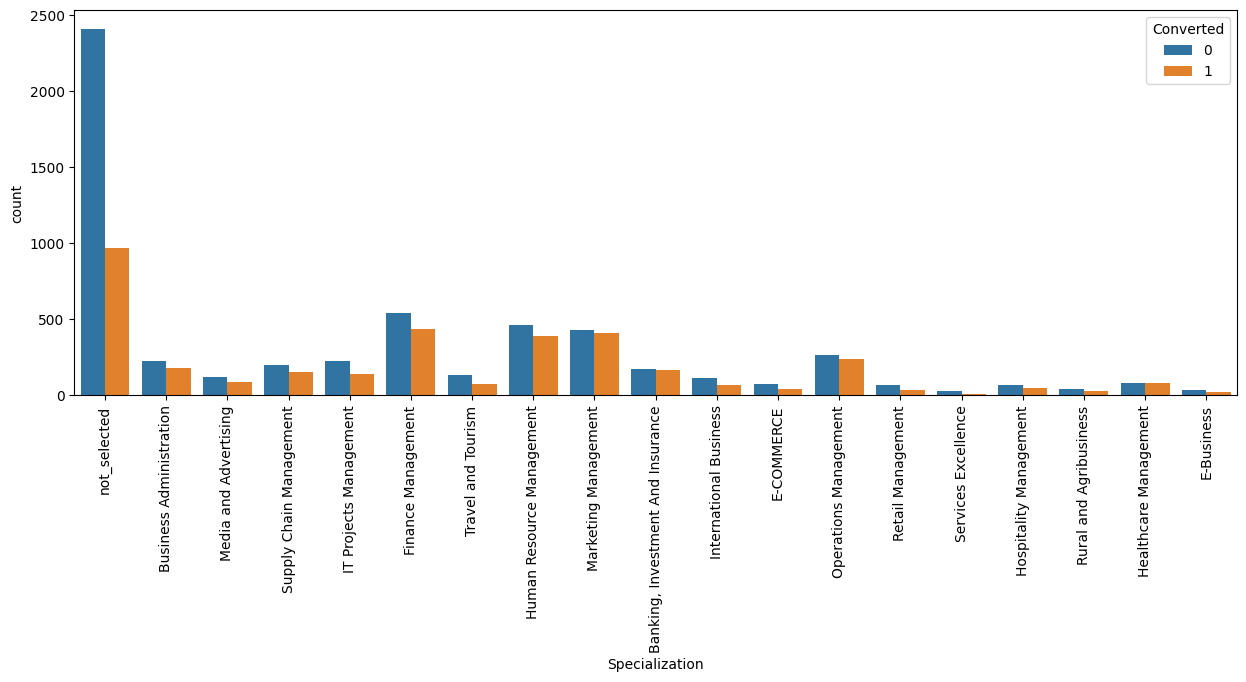

In [326]:
# Create plot for better understanding
create_plot("Specialization")

- We can see in the graph that the "Management" specialization have good convertion rate.
- We can bin all management "Management" specialization into one.

In [327]:
# Replace the values
lead_data['Specialization'] = lead_data['Specialization'].replace(['Finance Management', 'Human Resource Management', 'Marketing Management', 
                                                                   'Operations Management', 'IT Projects Management', 'Supply Chain Management', 
                                                                   'Healthcare Management', 'Hospitality Management', 'Retail Management'], 'management_specialization')

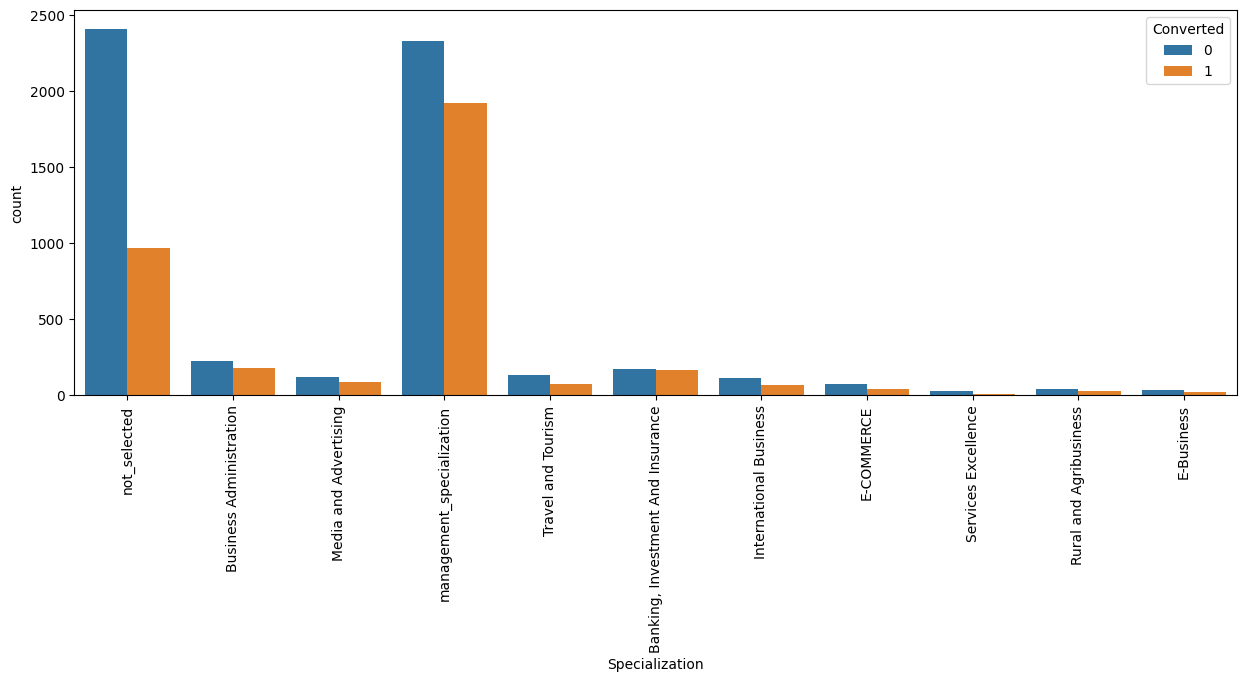

In [328]:
# Create plot for better understanding
create_plot("Specialization")

**Conclusion:**
1. As we can see the "management specialization" is a very significant variable for out analysis, It has very high convertion rate.
2. In order to improve the lead convertion rate, we can focus on targeting more individuals with a specialization in "Management" through marketing or referrals.

**6. What is your current occupation**

In [329]:
# Check the value count of the variable
lead_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

- We can replace the null values with "Unemployed"

In [330]:
# Replace the null values
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].fillna('Unemployed')

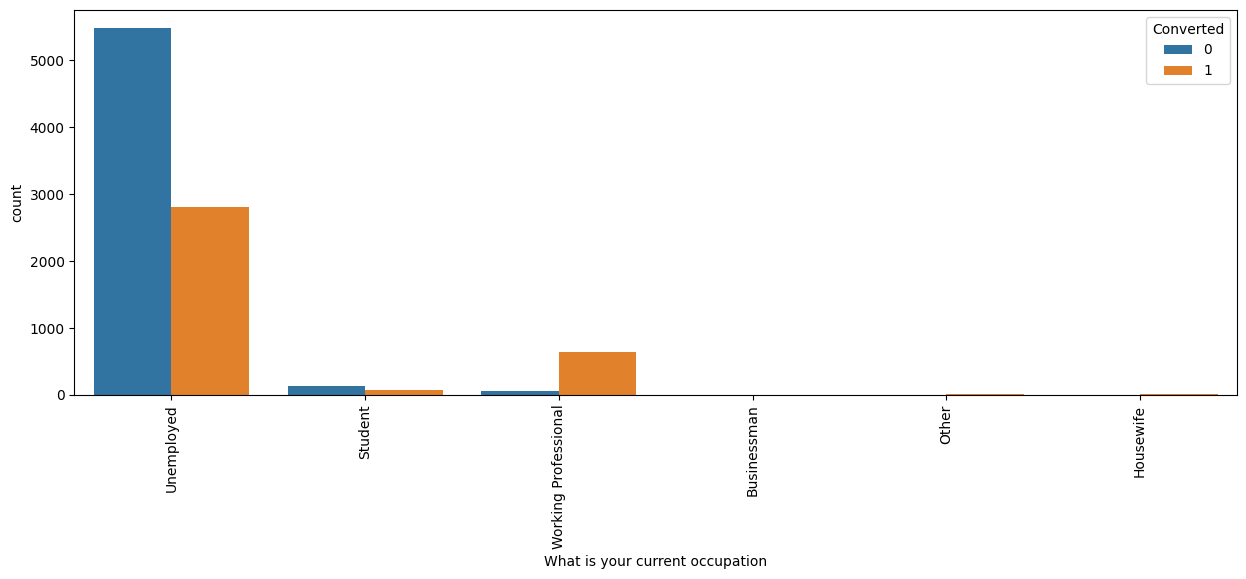

In [331]:
# Create plot for better understanding
create_plot("What is your current occupation")

**Conclusion:**
- As we can see, "Unemployed" and "Working Professional" categories exhibit a very high conversion rate, indicating a significant variable.
- We should primarily focus on working professionals since they have a higher conversion rate compared to the non-conversion rate.
- Unemployed individuals are also important as they might be upskilling themselves in order to seize opportunities.

**7. What matters most to you in choosing a course**

In [332]:
# Check the value count of the variable
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- We can replace the null values with "Better Career Prospects"

In [333]:
# Replace the null values
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].fillna('Better Career Prospects')

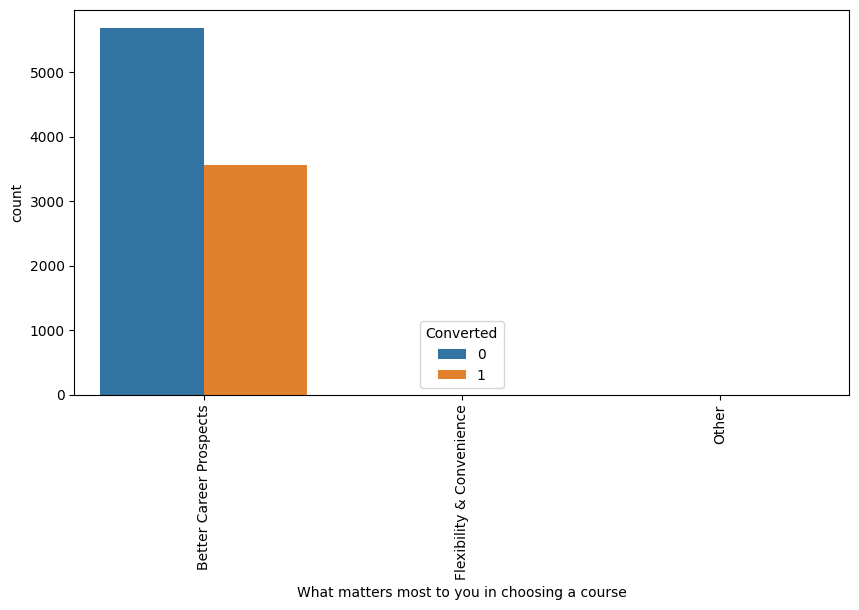

In [334]:
# Create plot for better understanding
create_plot("What matters most to you in choosing a course", figsize=(10, 5))

In [335]:
# Append the column name in empty list to drop it
cols_to_remove.append("What matters most to you in choosing a course")

**Conclusion:**
1. Since majority of the values in variable "What matters most to you in choosing a course" is "Better Career Prospects", we can drop this variable.

**8. Tags**

In [336]:
# Check the value count of the variable
lead_data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

- We will keep the top 5 tage and replace the remainig tages with the values "other_tags".
- we will also replace the null values with the values "other_tags".

In [337]:
# Replace the values
lead_data['Tags'] = lead_data['Tags'].replace(['switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA', 
                                               'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup', 
                                               'number not provided', 'in touch with EINS', 'Lost to Others', 'Still Thinking', 
                                               'Want to take admission but has financial', 'In confusion whether part time or DLP', 'Interested in Next batch', 
                                               'Lateral student', 'Shall take in the next coming month', 'University not recognized', 
                                               'Recognition issue (DEC approval)'], 'other_tags')

In [338]:
# Replace the null values
lead_data['Tags'] = lead_data['Tags'].fillna('other_tags')

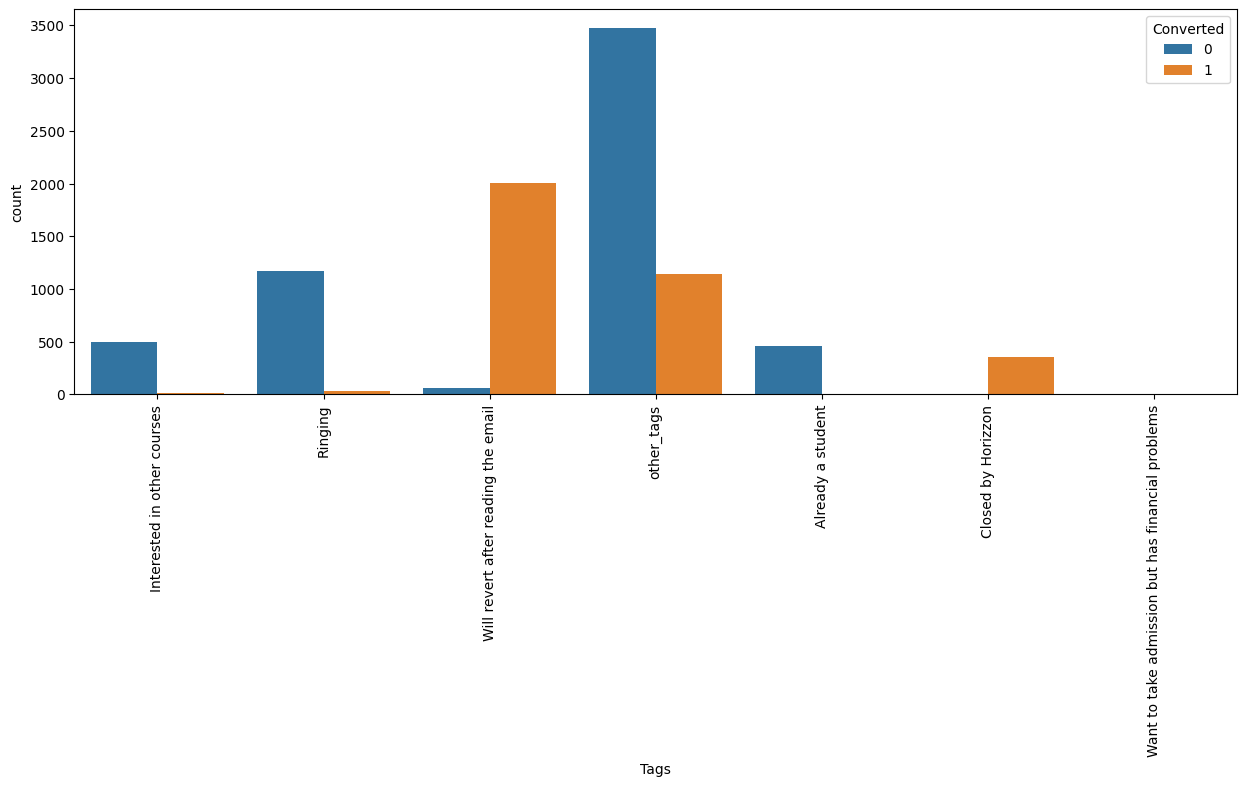

In [339]:
# Create plot for better understanding
create_plot("Tags")

In [340]:
# Append the column name in empty list to drop it
cols_to_remove.append("Tags")

**Conclusion:**
1. It is not adding much values to the analysis, we can remove the column.

**9. City**

In [341]:
# Check the value count of the variable
lead_data['City'].value_counts(dropna=False)

Mumbai                         3222
<NA>                           2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

- We will replace the null values with "Mumbai" as it is appearing the highest

In [342]:
lead_data['City'] = lead_data['City'].fillna('Mumbai')

In [343]:
# Check the value count of the variable
lead_data['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

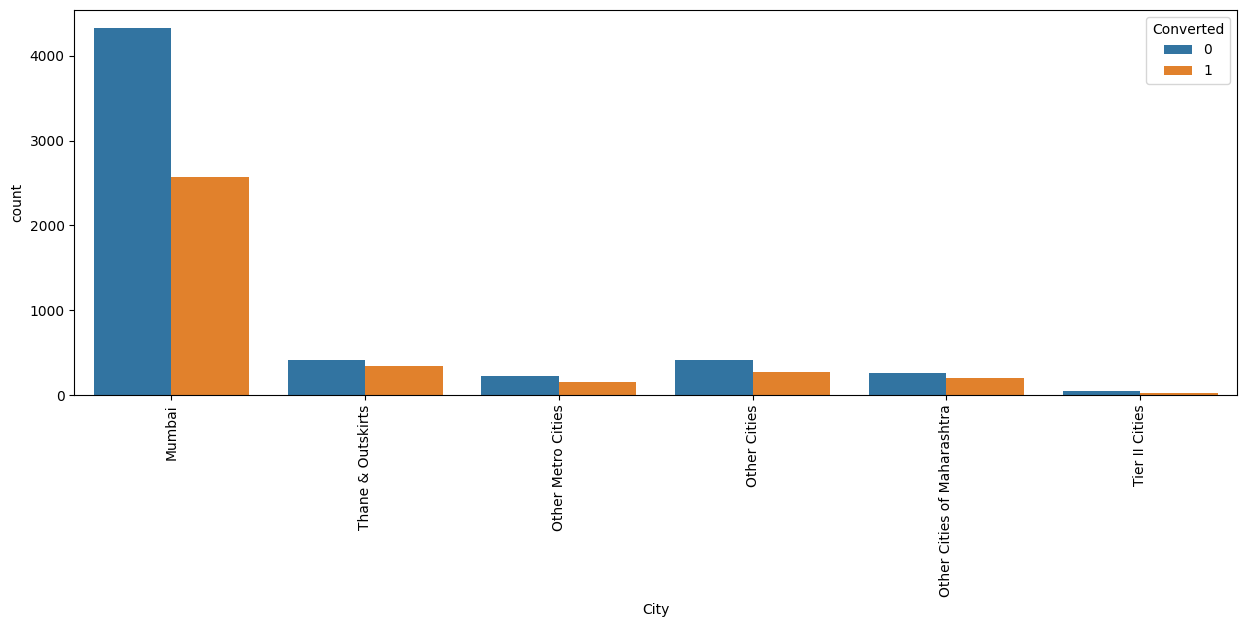

In [344]:
create_plot("City")

**Conclusion:**
1. Most of the leads are from "Mumbai".

**10. Last Notable Activity**

In [345]:
# Check the value count of the variable
lead_data['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

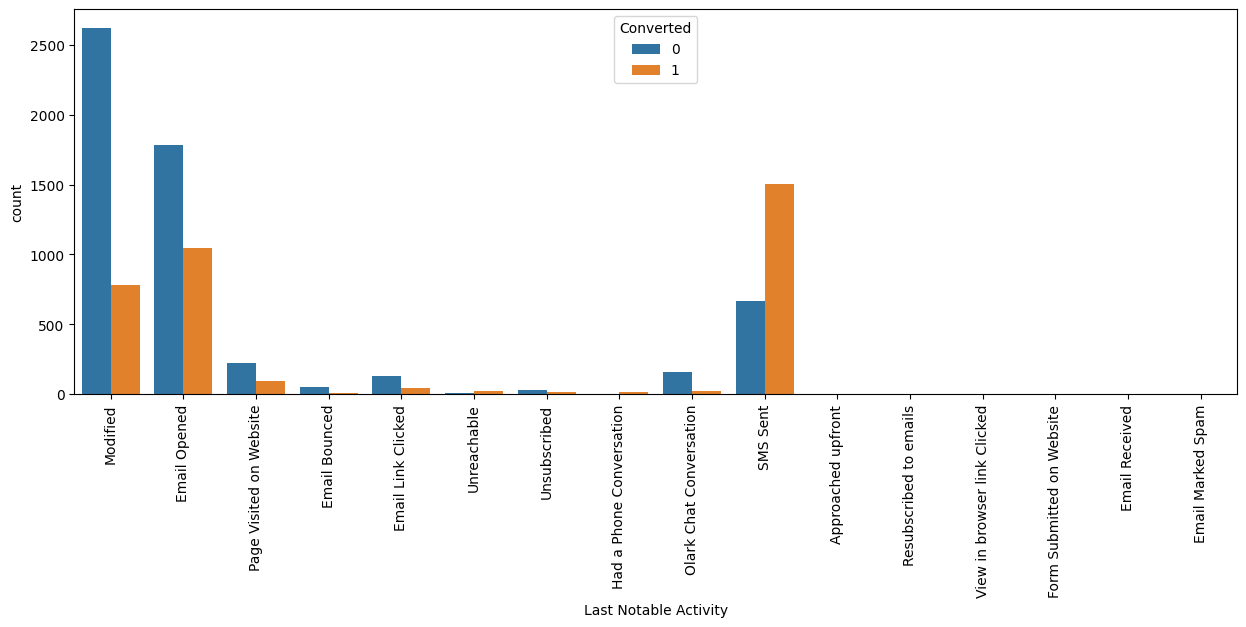

In [346]:
create_plot('Last Notable Activity')

In [347]:
# Append the column name in empty list to drop it
cols_to_remove.append("Last Notable Activity")

**Conclusion:**
1. It is not adding much values to the analysis, we can remove this column.

In [348]:
# # Printing the unique values present in the data
# for col in lead_data.columns:
#     unique_values = lead_data[col].unique()
#     print(f"'{col}': {unique_values}\n")

In [349]:
# yes_no_columns = []
# for col in lead_data.columns:
#     if lead_data[col].isin(['Yes', 'No', 'yes', 'no']).any():
#         yes_no_columns.append(col)
#         unique_values = lead_data[col].unique()
#         print(f"'{col}': {unique_values}\n")
#     else:
#         pass